<h1 style="font-size: 36px;">Exploratory Data Analysis (EDA)</h1>

Exploratory Data Analysis (EDA) is a crucial step in any data analysis project. EDA helps in understanding the dataset's features, their relationships, and identifying any abnormal or interesting trends that can guide further analysis.

<h2 style="font-size: 24px;">Step 1: Build data profiles and tables</h2>


- Start by importing the necessary libraries and loading the dataset.
- Check for missing data and handle it appropriately.
- Calculate descriptive statistics for each feature using methods such as mean, median, mode, and standard deviation.
- Identify any outliers or abnormal values in the dataset.
- Check for the distribution of each feature and transform the data if necessary.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('multi_level_columns_dataframe.csv', header=[0, 1], index_col=0)

df.head()

MA Mobile Home or Trailer  \
                                Selected Geographies                  Owned   
0  Berkshire County--Pittsfield City PUMA, Massac...                    545   
1  Franklin & Hampshire (North) Counties PUMA, Ma...                    759   
2  Worcester County (Central)--Worcester City PUM...                      0   
3  Worcester County (Northeast)--Leominster, Fitc...                    304   
4  Worcester County (West Central) PUMA, Massachu...                    553   

                                            \
  Rented Monthly Owner Costs With Mortgage   
0     52                              43.0   
1    265                              37.0   
2    113                               NaN   
3      0                              32.0   
4      0                              51.0   

                                                             \
  Monthly Owner Costs Without Mortgage Monthly Renter Costs   
0                                 39.0                101.0   
1                                 31.0                 20.0   
2                                  NaN                  NaN   
3                                 55.0                  NaN   
4                                 21.0                  NaN   

  One-family house detached                                           \
                      Owned Rented Monthly Owner Costs With Mortgage   
0                     35087   2086                                27   
1                     25815   4030                                29   
2                     22183   2984                                26   
3                     27257   1887                                25   
4                     34045   2161                                24   

                                        ... 20-49 Apartments         \
  Monthly Owner Costs Without Mortgage  ...            Owned Rented   
0                                   18  ...              163   1941   
1                                   18  ...              211    919   
2                                   22  ...             1039   2423   
3                                   17  ...              489   2262   
4                                   18  ...              453    747   

                                                                          \
  Monthly Owner Costs With Mortgage Monthly Owner Costs Without Mortgage   
0                               NaN                                  7.0   
1                               NaN                                 13.0   
2                              86.0                                  8.0   
3                              39.0                                 22.0   
4                               NaN                                 25.0   

                       50 or More Apartments         \
  Monthly Renter Costs                 Owned Rented   
0                   55                    36   1020   
1                   42                    55   1114   
2                   28                   387   6714   
3                   45                   287   3114   
4                   47                     0    255   

                                                                          \
  Monthly Owner Costs With Mortgage Monthly Owner Costs Without Mortgage   
0                              10.0                                  NaN   
1                               NaN                                 17.0   
2                              34.0                                  NaN   
3                               NaN                                 14.0   
4                               NaN                                  NaN   

                        
  Monthly Renter Costs  
0                   45  
1                   41  
2                   42  
3                   30  
4                   44  

[5 rows x 46 columns]

In [3]:
# New columns “Owned %”, “Rented %”, and “Total”

housing_types = [
    "Mobile Home or Trailer",
    "One-family house detached",
    "One-family house attached",
    "2 Apartments",
    "3-4 Apartments",
    "5-9 Apartments",
    "10-19 Apartments",
    "20-49 Apartments",
    "50 or More Apartments",
]

for housing_type in housing_types:
    owned_col = (housing_type, "Owned")
    rented_col = (housing_type, "Rented")
    df.columns = pd.MultiIndex.from_tuples(df.columns, names=['Housing Type', 'Data Type'])
    df = df.loc[:, ~df.columns.duplicated()]

    
    # Calculate the percentages and totals
    df[(housing_type, "Owned %")] = (df[owned_col] / (df[owned_col] + df[rented_col]) * 100).round(1)
    df[(housing_type, "Rented %")] = (df[rented_col] / (df[owned_col] + df[rented_col]) * 100).round(1)
    df[(housing_type, "Total")] = df[owned_col] + df[rented_col]

    # Reorder the columns to place the new columns next to the "Rented" column
    columns = list(df.columns)
    rented_index = columns.index(rented_col)
    columns.insert(rented_index + 1, (housing_type, "Total"))
    columns.insert(rented_index + 1, (housing_type, "Rented %"))
    columns.insert(rented_index + 1, (housing_type, "Owned %"))
    df = df[columns]

df.head()

Housing Type                                                 MA  \
Data Type                                  Selected Geographies   
0             Berkshire County--Pittsfield City PUMA, Massac...   
1             Franklin & Hampshire (North) Counties PUMA, Ma...   
2             Worcester County (Central)--Worcester City PUM...   
3             Worcester County (Northeast)--Leominster, Fitc...   
4             Worcester County (West Central) PUMA, Massachu...   

Housing Type Mobile Home or Trailer                                \
Data Type                     Owned Rented Owned % Rented % Total   
0                               545     52    91.3      8.7   597   
1                               759    265    74.1     25.9  1024   
2                                 0    113     0.0    100.0   113   
3                               304      0   100.0      0.0   304   
4                               553      0   100.0      0.0   553   

Housing Type                                    \
Data Type    Monthly Owner Costs With Mortgage   
0                                         43.0   
1                                         37.0   
2                                          NaN   
3                                         32.0   
4                                         51.0   

Housing Type                                                            \
Data Type    Monthly Owner Costs Without Mortgage Monthly Renter Costs   
0                                            39.0                101.0   
1                                            31.0                 20.0   
2                                             NaN                  NaN   
3                                            55.0                  NaN   
4                                            21.0                  NaN   

Housing Type One-family house detached  ... 50 or More Apartments          \
Data Type                        Owned  ...                Rented Owned %   
0                                35087  ...                  1020     3.4   
1                                25815  ...                  1114     4.7   
2                                22183  ...                  6714     5.4   
3                                27257  ...                  3114     8.4   
4                                34045  ...                   255     0.0   

Housing Type                                                   \
Data Type    Rented % Total Monthly Owner Costs With Mortgage   
0                96.6  1056                              10.0   
1                95.3  1169                               NaN   
2                94.6  7101                              34.0   
3                91.6  3401                               NaN   
4               100.0   255                               NaN   

Housing Type                                                            \
Data Type    Monthly Owner Costs Without Mortgage Monthly Renter Costs   
0                                             NaN                   45   
1                                            17.0                   41   
2                                             NaN                   42   
3                                            14.0                   30   
4                                             NaN                   44   

Housing Type                         
Data Type    Owned % Rented % Total  
0                3.4     96.6  1056  
1                4.7     95.3  1169  
2                5.4     94.6  7101  
3                8.4     91.6  3401  
4                0.0    100.0   255  

[5 rows x 76 columns]

In [4]:
# Identify the number of missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Housing Type            Data Type                           
MA                      Selected Geographies                     0
Mobile Home or Trailer  Owned                                    0
                        Rented                                   0
                        Owned %                                 15
                        Rented %                                15
                                                                ..
50 or More Apartments   Monthly Owner Costs Without Mortgage    18
                        Monthly Renter Costs                     0
                        Owned %                                  0
                        Rented %                                 0
                        Total                                    0
Length: 76, dtype: int64


In [5]:
#Ignore NaN when I do my analysis

In [6]:
# Calculate descriptive statistics for each feature:

# Custom function to calculate mode
def calculate_mode(series):
    mode = series.mode()
    return mode.iloc[0] if not mode.empty else np.nan

# Descriptive statistics
desc_stats = df.describe().T

# Flatten multi-index DataFrame for mode calculation
temp_df = df.copy()
flat_columns = ['_'.join(col).strip() for col in temp_df.columns.values]
temp_df.columns = flat_columns

# Calculate mode for each flat column and store it in a dictionary
mode_dict = {col: calculate_mode(temp_df[col]) for col in flat_columns}

# Create a dictionary to map original multi-index column names to flattened column names
col_mapping = dict(zip(df.columns, flat_columns))

# Add the mode to the descriptive statistics DataFrame
desc_stats['mode'] = desc_stats.index.map(lambda x: mode_dict[col_mapping[x]])

# Display descriptive statistics
print(desc_stats)

                                                             count  \
Housing Type           Data Type                                     
Mobile Home or Trailer Owned                                  52.0   
                       Rented                                 52.0   
                       Owned %                                37.0   
                       Rented %                               37.0   
                       Total                                  52.0   
...                                                            ...   
50 or More Apartments  Monthly Owner Costs Without Mortgage   34.0   
                       Monthly Renter Costs                   52.0   
                       Owned %                                52.0   
                       Rented %                               52.0   
                       Total                                  52.0   

                                                                    mean  \
Housing Type 

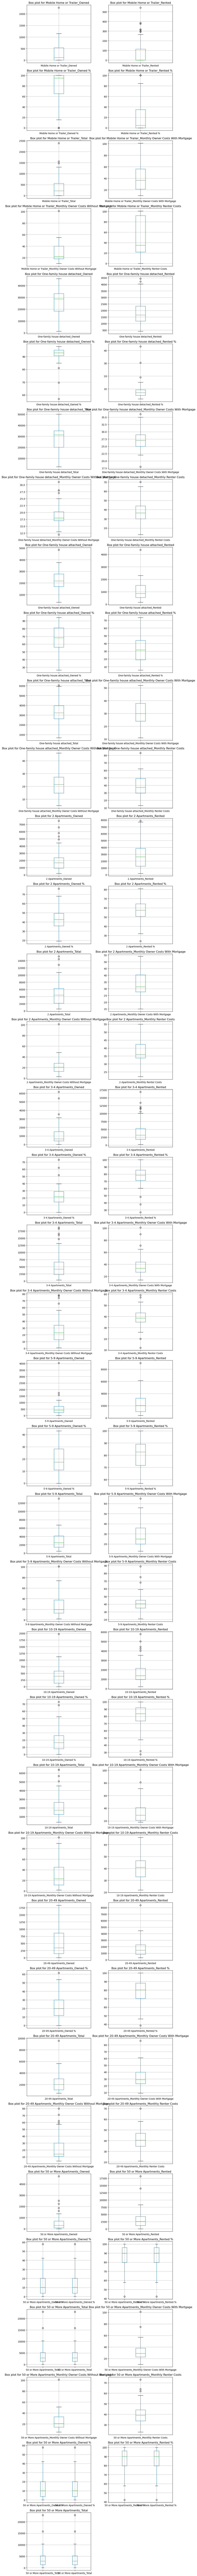

In [7]:
# Flatten the multi-index column names
flat_columns = ['_'.join(col).strip() for col in df.columns.values]
df_flat = df.copy()
df_flat.columns = flat_columns

# Box plots for numeric features
numeric_features = df_flat.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns for the subplots
ncols = 2
nrows = math.ceil(len(numeric_features) / ncols)

# Set the size of the entire figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, nrows * 4))

# Flatten the axes array
flat_axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    # Create a box plot for the current feature using pandas boxplot function
    df_flat[[feature]].boxplot(ax=flat_axes[idx])
    flat_axes[idx].set_title(f"Box plot for {feature}")

# Remove any unused axes
for idx in range(len(numeric_features), nrows * ncols):
    fig.delaxes(flat_axes[idx])

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()


In [8]:
# Display the structure of the DataFrame
print("DataFrame Structure:")
print(df_flat.info())

# Display the first few rows of the DataFrame
print("\nFirst 5 Rows:")
print(df_flat.head(5))

DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 76 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   MA_Selected Geographies                                         52 non-null     object 
 1   Mobile Home or Trailer_Owned                                    52 non-null     int64  
 2   Mobile Home or Trailer_Rented                                   52 non-null     int64  
 3   Mobile Home or Trailer_Owned %                                  37 non-null     float64
 4   Mobile Home or Trailer_Rented %                                 37 non-null     float64
 5   Mobile Home or Trailer_Total                                    52 non-null     int64  
 6   Mobile Home or Trailer_Monthly Owner Costs With Mortgage        24 non-null     float64
 7   Mobile Home or Trailer_Monthly Own

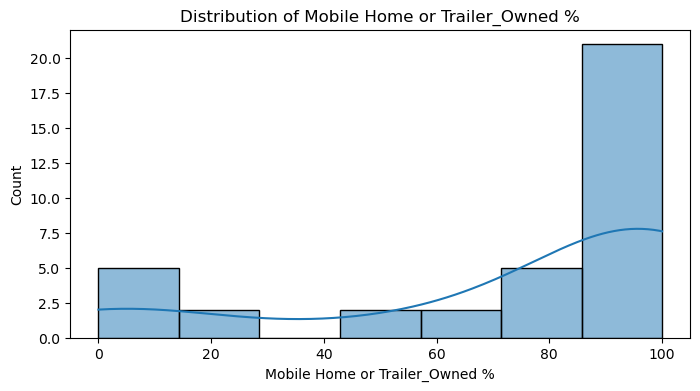

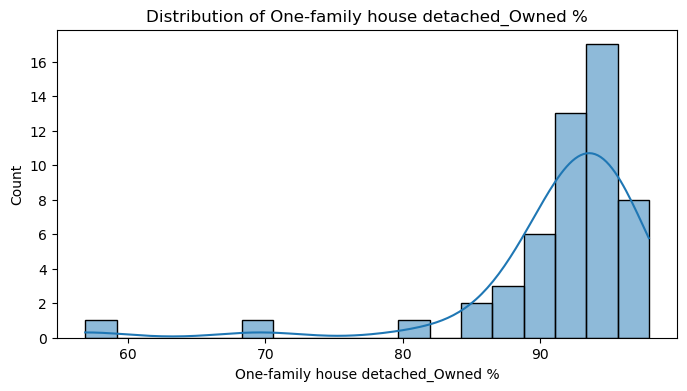

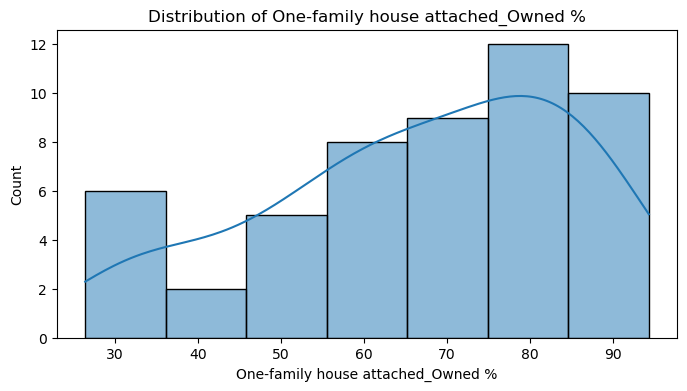

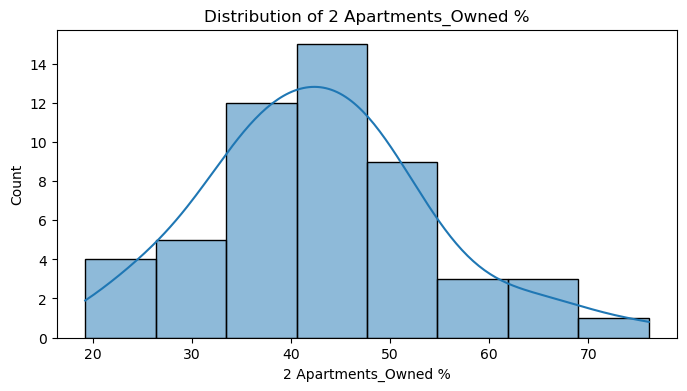

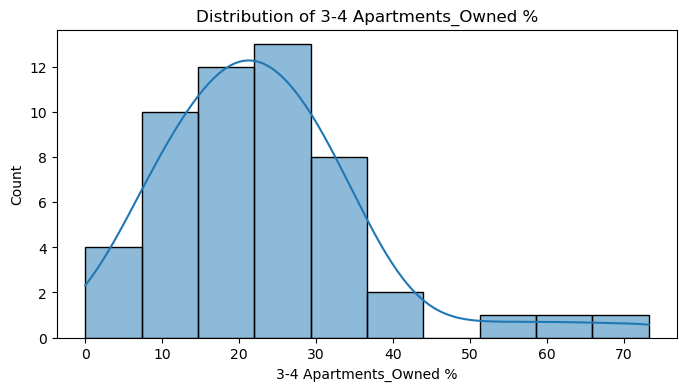

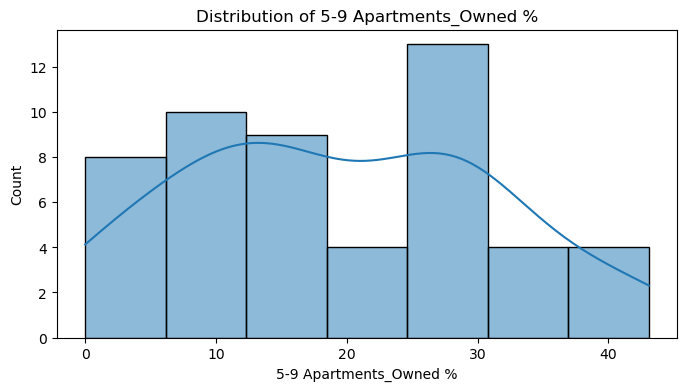

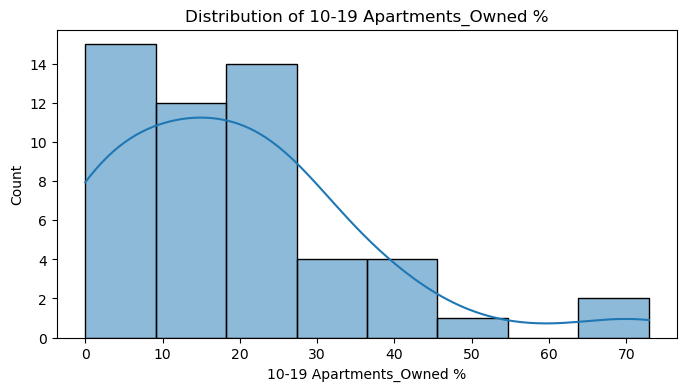

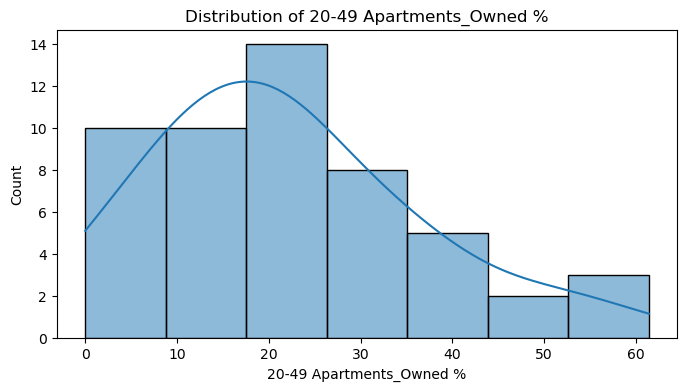

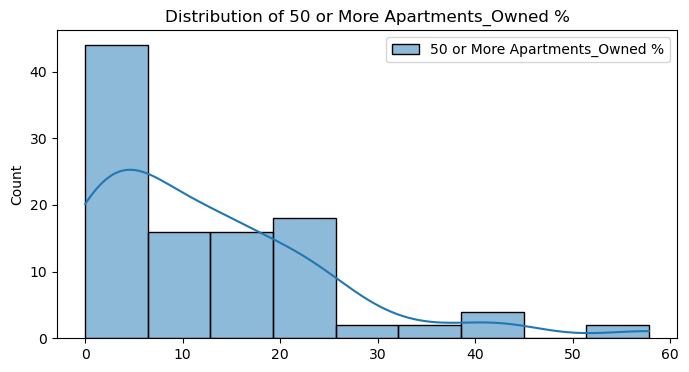

In [9]:
# Assuming 'df_flat' is your DataFrame containing housing information
housing_types = [
    "Mobile Home or Trailer",
    "One-family house detached",
    "One-family house attached",
    "2 Apartments",
    "3-4 Apartments",
    "5-9 Apartments",
    "10-19 Apartments",
    "20-49 Apartments",
    "50 or More Apartments",
]

numeric_features = [f"{housing_type}_Owned %" for housing_type in housing_types]

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_flat[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

<h2 style="font-size: 24px;">Step 2: Inferential Statistics</h2>

Inferential statistics is an important step in data analysis that helps in drawing conclusions and making predictions about a larger population based on a sample of data. Here are the key steps to follow when conducting inferential statistics:

## **Identify any abnormal results in the dataset and form null and alternative hypotheses**
- Start by reviewing the results of your exploratory data analysis (EDA) and identifying any abnormal or interesting trends in the data.
- Formulate a null hypothesis (H0) and an alternative hypothesis (H1) that can be tested using statistical methods. The null hypothesis is usually the default assumption that there is no significant difference or relationship between variables, while the alternative hypothesis is the opposite of the null hypothesis.

In [10]:
import scipy.stats as stats

# Extract data for each cost type
owner_costs_with_mortgage = df.loc[:, df.columns.get_level_values(1).isin(["Monthly Owner Costs With Mortgage"])].values.flatten()
owner_costs_without_mortgage = df.loc[:, df.columns.get_level_values(1).isin(["Monthly Owner Costs Without Mortgage"])].values.flatten()
renter_costs = df.loc[:, df.columns.get_level_values(1).isin(["Monthly Renter Costs"])].values.flatten()

# Remove NaN values
owner_costs_with_mortgage = owner_costs_with_mortgage[~pd.isna(owner_costs_with_mortgage)]
owner_costs_without_mortgage = owner_costs_without_mortgage[~pd.isna(owner_costs_without_mortgage)]
renter_costs = renter_costs[~pd.isna(renter_costs)]

# Perform one-way ANOVA
f_value, p_value = stats.f_oneway(owner_costs_with_mortgage, owner_costs_without_mortgage, renter_costs)
print("F-value:", f_value)
print("P-value:", p_value)

F-value: 93.89501876482153
P-value: 1.405018982193003e-38


F-value is 93.89501876482153, meaning that the between-group variability is much larger than the within-group variability, suggesting that there is a significant difference between the means of the groups being compared.

P-value is less than significance level (e.g., 0.05);therefore, reject the null hypothesis and conclude that there is a significant difference in the average costs across the three groups (owner cost with mortgage, owner cost without mortgage, and renter cost).

In [11]:
# Display the structure of the DataFrame
print("DataFrame Structure:")
print(df.info())

# Display the first few rows of the DataFrame
print("\nFirst 5 Rows:")
print(df.head(5))

DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 76 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   (MA, Selected Geographies)                                         52 non-null     object 
 1   (Mobile Home or Trailer, Owned)                                    52 non-null     int64  
 2   (Mobile Home or Trailer, Rented)                                   52 non-null     int64  
 3   (Mobile Home or Trailer, Owned %)                                  37 non-null     float64
 4   (Mobile Home or Trailer, Rented %)                                 37 non-null     float64
 5   (Mobile Home or Trailer, Total)                                    52 non-null     int64  
 6   (Mobile Home or Trailer, Monthly Owner Costs With Mortgage)        24 non-null     float64
 7   (Mobile

## **Step 3: Explore Data Relationships**

Use scatter plots, histograms, and box plots to identify relationships between features.
Check for multicollinearity using correlation matrices.
Explore the relationship between independent and dependent variables.

In [12]:
# Get the unique housing types excluding 'MA'
housing_types = [ht for ht in df.columns.get_level_values(0).unique() if ht != 'MA']

# Extract total columns for each housing type
total_columns = [(housing_type, 'Total') for housing_type in housing_types]

# Create a new DataFrame to store the aggregated data
df_agg = pd.DataFrame(df[total_columns])

# Reset the index
df_agg.columns = df_agg.columns.droplevel(1)
df_agg.reset_index(inplace=True)

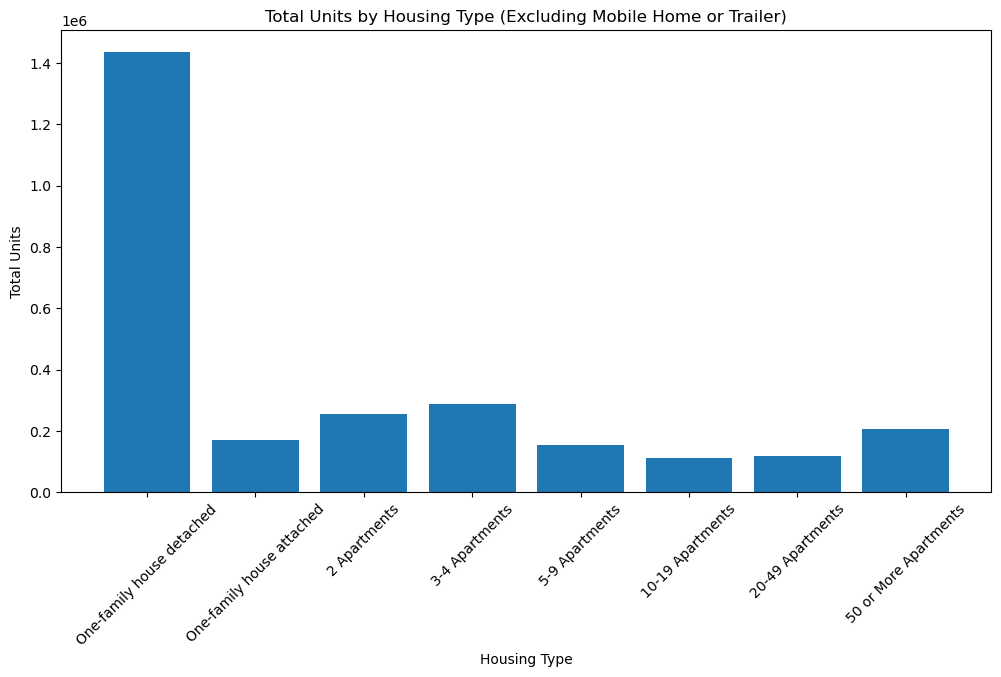

In [13]:
# Remove duplicate "50 or More Apartments" column
df_agg = df_agg.loc[:, ~df_agg.columns.duplicated()]

# Extract housing types and their corresponding total values
housing_types = df_agg.columns.get_level_values(0).unique()
housing_types = housing_types[housing_types != 'index']
housing_types = housing_types[housing_types != 'Mobile Home or Trailer']
total_values = [df_agg[ht].sum().sum() for ht in housing_types]

# Create a bar plot for the total units by housing type (excluding Mobile Home or Trailer)
plt.figure(figsize=(12, 6))
plt.bar(housing_types, total_values)
plt.xticks(rotation=45)
plt.xlabel('Housing Type')
plt.ylabel('Total Units')
plt.title('Total Units by Housing Type (Excluding Mobile Home or Trailer)')
plt.show()

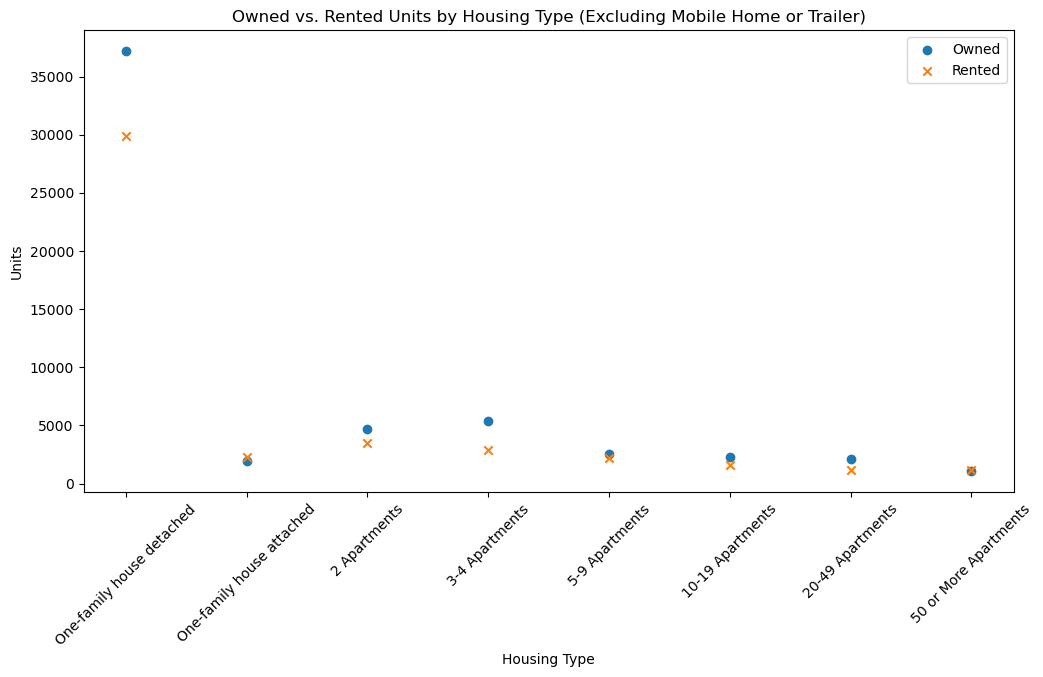

In [14]:
# Scatter plot between owned and rented units for each housing type:
# Extract the owned and rented units for each housing type
housing_types = [
    "One-family house detached",
    "One-family house attached",
    "2 Apartments",
    "3-4 Apartments",
    "5-9 Apartments",
    "10-19 Apartments",
    "20-49 Apartments",
    "50 or More Apartments",
]

owned_units = df_agg[housing_types].iloc[0].values
rented_units = df_agg[housing_types].iloc[1].values

# Create a scatter plot for the owned and rented units by housing type (excluding Mobile Home or Trailer)
plt.figure(figsize=(12, 6))
plt.scatter(housing_types, owned_units, label='Owned', marker='o')
plt.scatter(housing_types, rented_units, label='Rented', marker='x')
plt.xticks(rotation=45)
plt.xlabel('Housing Type')
plt.ylabel('Units')
plt.title('Owned vs. Rented Units by Housing Type (Excluding Mobile Home or Trailer)')
plt.legend()
plt.show()

## Step 4: Data Visualization
Use the matplotlib and seaborn libraries to create visualizations that help in understanding the data. Create scatter plots, histograms, and box plots to identify relationships between features. Visualize the relationship between independent and dependent variables using scatterplots, line plots, or bar plots.

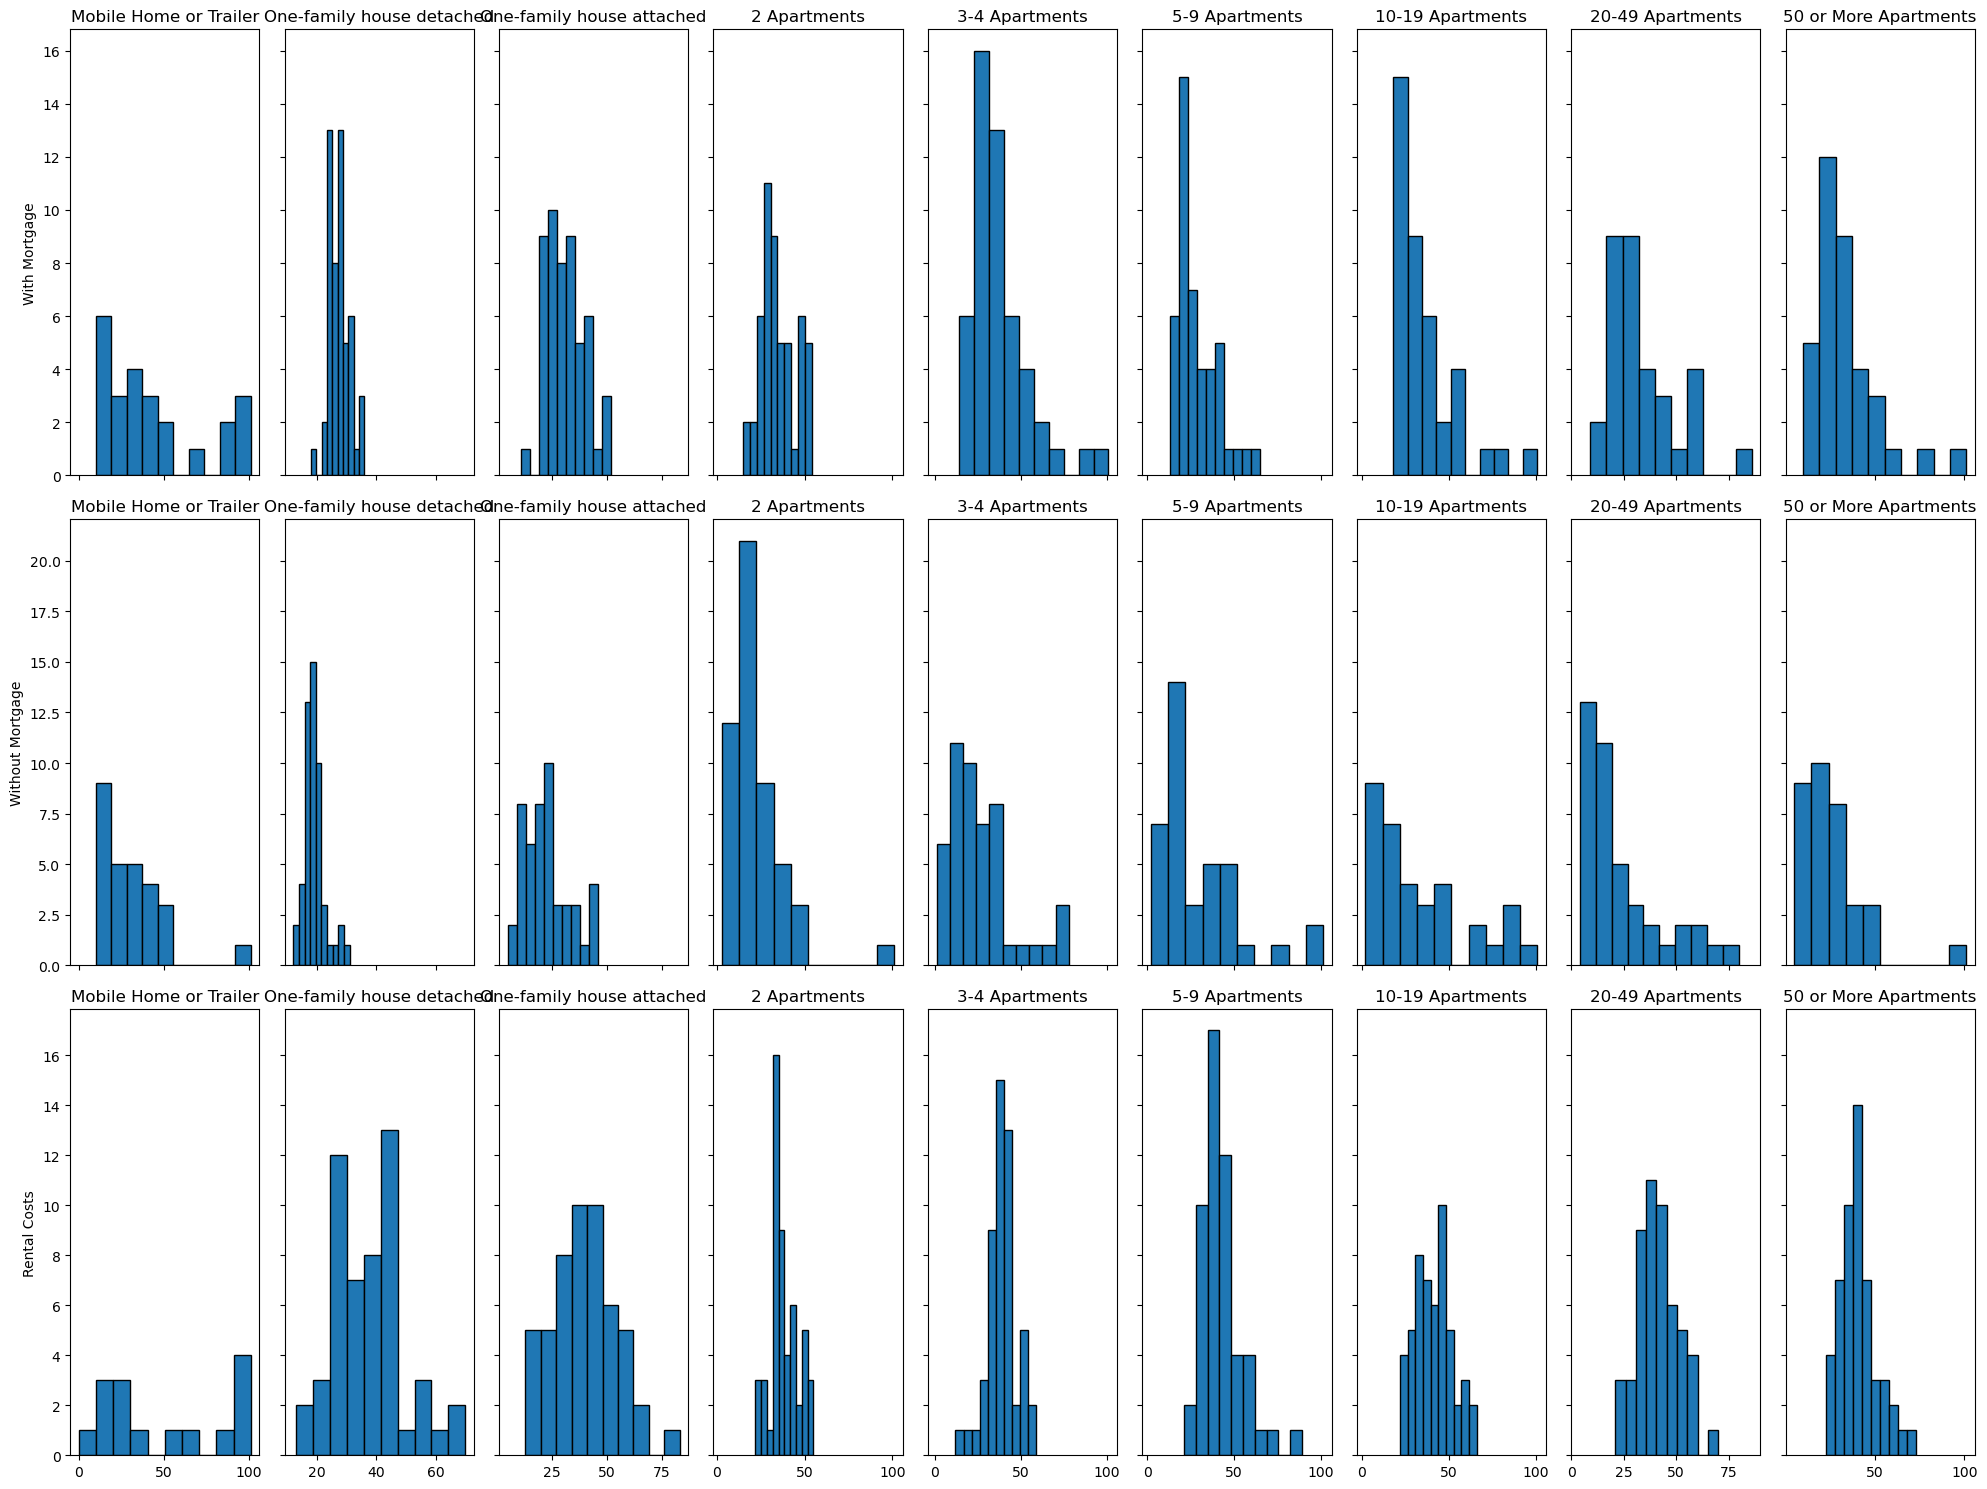

In [15]:
import matplotlib.pyplot as plt

# Extract relevant data from the DataFrame
monthly_owner_costs_with_mortgage = df.xs('Monthly Owner Costs With Mortgage', level='Data Type', axis=1)
monthly_owner_costs_without_mortgage = df.xs('Monthly Owner Costs Without Mortgage', level='Data Type', axis=1)
monthly_rental_costs = df.xs('Monthly Renter Costs', level='Data Type', axis=1)

# Determine the number of housing types
num_housing_types = len(monthly_owner_costs_with_mortgage.columns)

# Create histograms for each data set and housing type
fig, axes = plt.subplots(3, num_housing_types, figsize=(20, 15), sharex='col', sharey='row')

for i, data in enumerate([monthly_owner_costs_with_mortgage, monthly_owner_costs_without_mortgage, monthly_rental_costs]):
    for j, (col_name, col_data) in enumerate(data.iteritems()):
        axes[i, j].hist(col_data.dropna().values, bins=10, edgecolor='black')
        axes[i, j].set_title(f'{col_name}')

# Set row titles
axes[0, 0].set_ylabel('With Mortgage')
axes[1, 0].set_ylabel('Without Mortgage')
axes[2, 0].set_ylabel('Rental Costs')

# Adjust layout
plt.tight_layout()
plt.show()

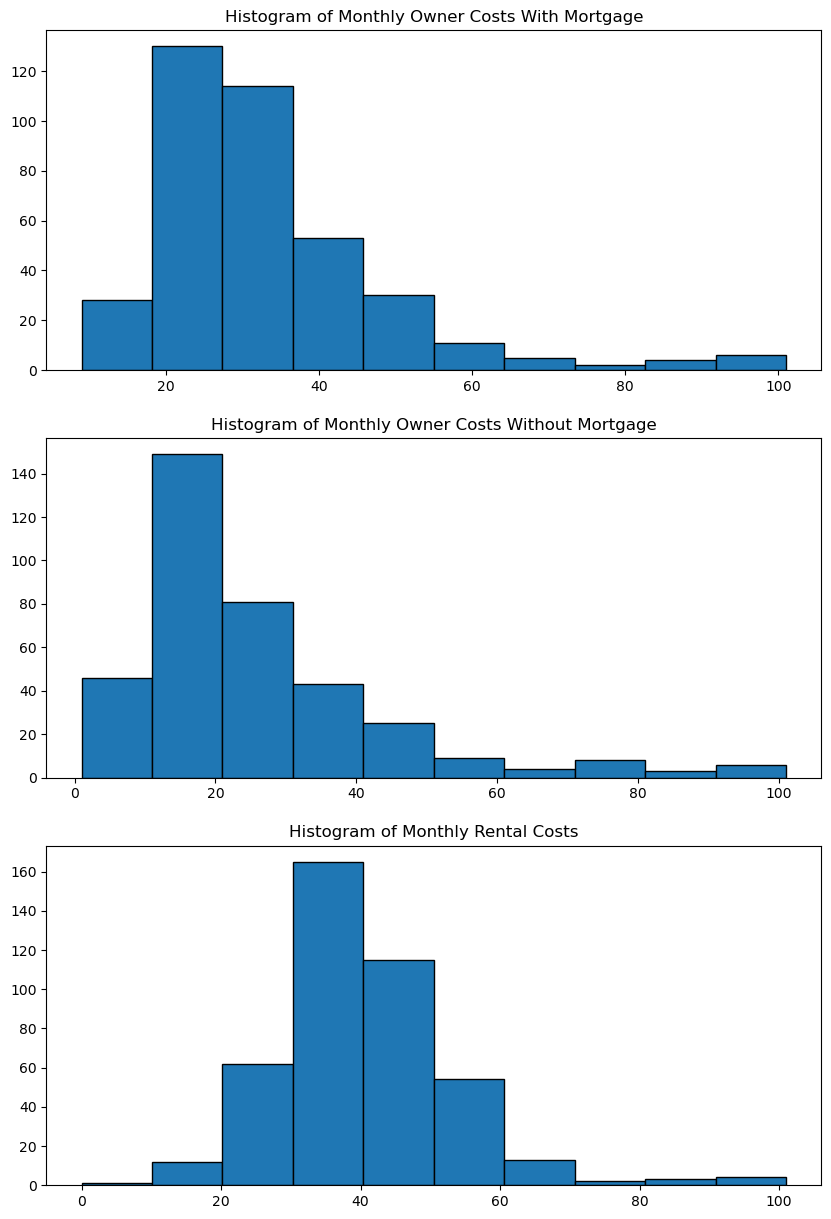

In [16]:
import matplotlib.pyplot as plt

# Extract relevant data from the DataFrame
monthly_owner_costs_with_mortgage = df.xs('Monthly Owner Costs With Mortgage', level='Data Type', axis=1)
monthly_owner_costs_without_mortgage = df.xs('Monthly Owner Costs Without Mortgage', level='Data Type', axis=1)
monthly_rental_costs = df.xs('Monthly Renter Costs', level='Data Type', axis=1)

# Create histograms for each data set
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].hist(monthly_owner_costs_with_mortgage.values.flatten(), bins=10, edgecolor='black')
axes[0].set_title('Histogram of Monthly Owner Costs With Mortgage')

axes[1].hist(monthly_owner_costs_without_mortgage.values.flatten(), bins=10, edgecolor='black')
axes[1].set_title('Histogram of Monthly Owner Costs Without Mortgage')

axes[2].hist(monthly_rental_costs.values.flatten(), bins=10, edgecolor='black')
axes[2].set_title('Histogram of Monthly Rental Costs')

# Show the histograms
plt.show()


In [17]:
print(df.head())
print(df.columns)

Housing Type                                                 MA  \
Data Type                                  Selected Geographies   
0             Berkshire County--Pittsfield City PUMA, Massac...   
1             Franklin & Hampshire (North) Counties PUMA, Ma...   
2             Worcester County (Central)--Worcester City PUM...   
3             Worcester County (Northeast)--Leominster, Fitc...   
4             Worcester County (West Central) PUMA, Massachu...   

Housing Type Mobile Home or Trailer                                \
Data Type                     Owned Rented Owned % Rented % Total   
0                               545     52    91.3      8.7   597   
1                               759    265    74.1     25.9  1024   
2                                 0    113     0.0    100.0   113   
3                               304      0   100.0      0.0   304   
4                               553      0   100.0      0.0   553   

Housing Type                                  

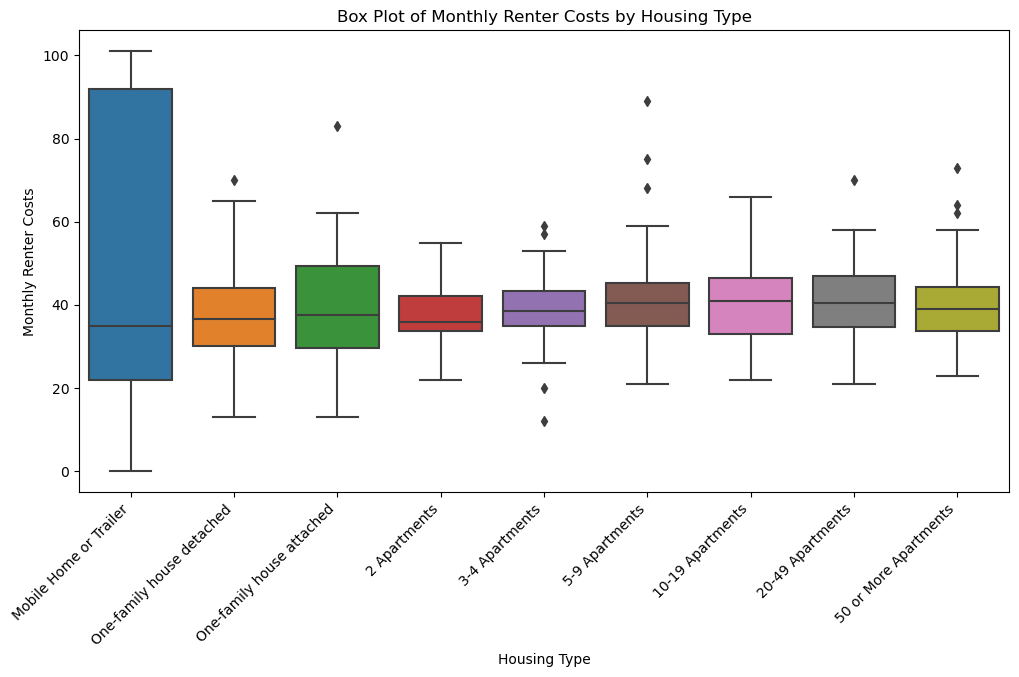

In [18]:
# Extract relevant data from the DataFrame
monthly_rental_costs = df.xs('Monthly Renter Costs', level='Data Type', axis=1)

# Reshape the DataFrame
renter_costs_long = pd.melt(monthly_rental_costs.reset_index(), id_vars=['index'], var_name='Housing Type', value_name='Monthly Renter Costs')
renter_costs_long = renter_costs_long.dropna()

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Housing Type', y='Monthly Renter Costs', data=renter_costs_long)

# Set plot title and labels
plt.title('Box Plot of Monthly Renter Costs by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Monthly Renter Costs')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Show the box plot
plt.show()

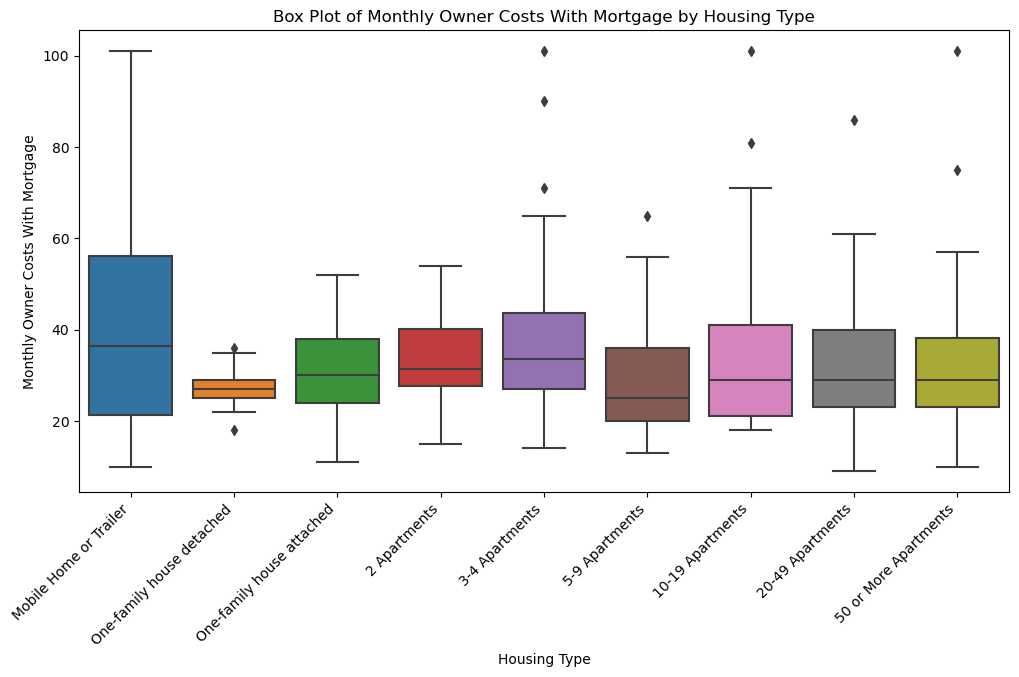

In [19]:
# Extract relevant data from the DataFrame
monthly_owner_costs_with_mortgage = df.xs('Monthly Owner Costs With Mortgage', level='Data Type', axis=1)

# Reshape the DataFrame
mortgage_costs_long = pd.melt(monthly_owner_costs_with_mortgage.reset_index(), id_vars=['index'], var_name='Housing Type', value_name='Monthly Owner Costs With Mortgage')
mortgage_costs_long = mortgage_costs_long.dropna()

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Housing Type', y='Monthly Owner Costs With Mortgage', data=mortgage_costs_long)

# Set plot title and labels
plt.title('Box Plot of Monthly Owner Costs With Mortgage by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Monthly Owner Costs With Mortgage')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Show the box plot
plt.show()

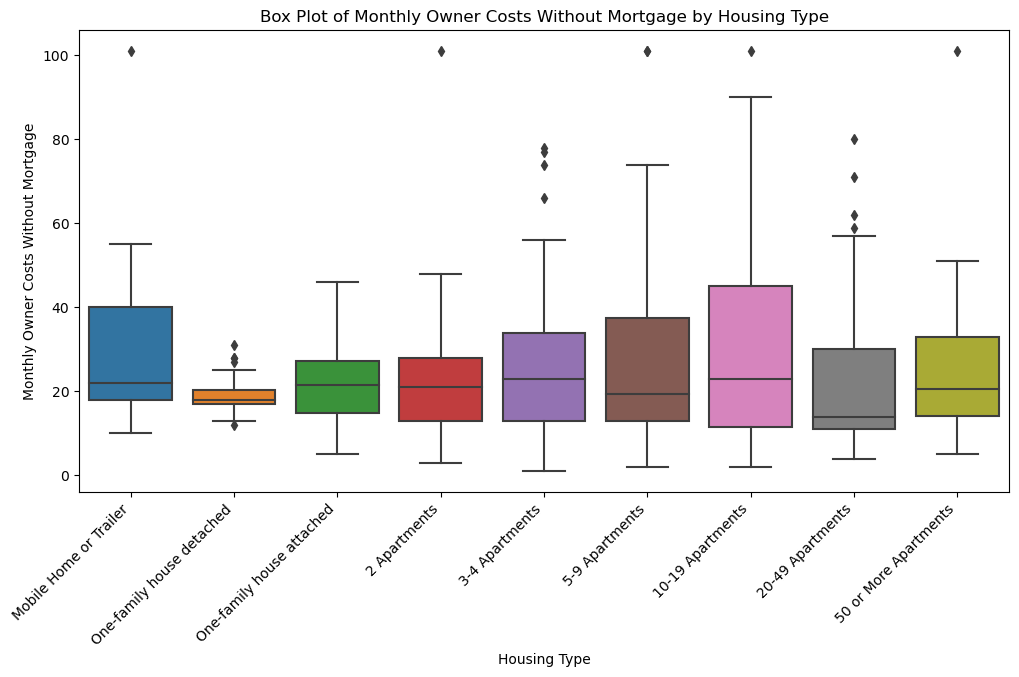

In [20]:
# Extract relevant data from the DataFrame
monthly_owner_costs_without_mortgage = df.xs('Monthly Owner Costs Without Mortgage', level='Data Type', axis=1)

# Reshape the DataFrame
without_mortgage_costs_long = pd.melt(monthly_owner_costs_without_mortgage.reset_index(), id_vars=['index'], var_name='Housing Type', value_name='Monthly Owner Costs Without Mortgage')
without_mortgage_costs_long = without_mortgage_costs_long.dropna()

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Housing Type', y='Monthly Owner Costs Without Mortgage', data=without_mortgage_costs_long)

# Set plot title and labels
plt.title('Box Plot of Monthly Owner Costs Without Mortgage by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Monthly Owner Costs Without Mortgage')

# Rotate x-axis labels to avoid overlapping
plt.xticks(rotation=45, ha='right')

# Show the box plot
plt.show()

## Step 5: Feature Selection and Engineering

Remove outliers using statistically valid methods.

In [37]:
import pandas as pd
import numpy as np

# Assuming you have your data in 'df' variable
housing_types = [
    'Mobile Home or Trailer',
    'One-family house detached',
    'One-family house attached',
    '2 Apartments',
    '3-4 Apartments',
    '5-9 Apartments',
    '10-19 Apartments',
    '20-49 Apartments',
    '50 or More Apartments'
]

cost_columns = [
    'Monthly Owner Costs With Mortgage',
    'Monthly Owner Costs Without Mortgage',
    'Monthly Renter Costs'
]

# Define a function to replace outliers with NaN
def replace_outliers_with_nan(df, housing_type, cost_column):
    column = df.xs((housing_type, cost_column), axis=1, level=('Housing Type', 'Data Type'))
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.where((column >= lower_bound) & (column <= upper_bound))

# Iterate through housing types and cost columns, apply the function and update the dataframe
for housing_type in housing_types:
    for cost_column in cost_columns:
        updated_column = replace_outliers_with_nan(df, housing_type, cost_column)
        df.loc[:, (housing_type, cost_column)] = updated_column

In [35]:
df.head()

Housing Type                                                 MA  \
Data Type                                  Selected Geographies   
0             Berkshire County--Pittsfield City PUMA, Massac...   
1             Franklin & Hampshire (North) Counties PUMA, Ma...   
2             Worcester County (Central)--Worcester City PUM...   
3             Worcester County (Northeast)--Leominster, Fitc...   
4             Worcester County (West Central) PUMA, Massachu...   

Housing Type Mobile Home or Trailer                                \
Data Type                     Owned Rented Owned % Rented % Total   
0                               545     52    91.3      8.7   597   
1                               759    265    74.1     25.9  1024   
2                                 0    113     0.0    100.0   113   
3                               304      0   100.0      0.0   304   
4                               553      0   100.0      0.0   553   

Housing Type                                    \
Data Type    Monthly Owner Costs With Mortgage   
0                                         43.0   
1                                         37.0   
2                                          NaN   
3                                         32.0   
4                                         51.0   

Housing Type                                                            \
Data Type    Monthly Owner Costs Without Mortgage Monthly Renter Costs   
0                                            39.0                101.0   
1                                            31.0                 20.0   
2                                             NaN                  NaN   
3                                            55.0                  NaN   
4                                            21.0                  NaN   

Housing Type One-family house detached  ... 50 or More Apartments          \
Data Type                        Owned  ...                Rented Owned %   
0                                35087  ...                  1020     3.4   
1                                25815  ...                  1114     4.7   
2                                22183  ...                  6714     5.4   
3                                27257  ...                  3114     8.4   
4                                34045  ...                   255     0.0   

Housing Type                                                   \
Data Type    Rented % Total Monthly Owner Costs With Mortgage   
0                96.6  1056                              10.0   
1                95.3  1169                               NaN   
2                94.6  7101                              34.0   
3                91.6  3401                               NaN   
4               100.0   255                               NaN   

Housing Type                                                            \
Data Type    Monthly Owner Costs Without Mortgage Monthly Renter Costs   
0                                             NaN                 45.0   
1                                            17.0                 41.0   
2                                             NaN                 42.0   
3                                            14.0                 30.0   
4                                             NaN                 44.0   

Housing Type                         
Data Type    Owned % Rented % Total  
0                3.4     96.6  1056  
1                4.7     95.3  1169  
2                5.4     94.6  7101  
3                8.4     91.6  3401  
4                0.0    100.0   255  

[5 rows x 76 columns]

In [38]:
df.to_csv("updated_dataframe.csv")